In [32]:
#Import the CSV file and try things

import pandas as pd

# Path to my dataset
file_path = "cleaned_properties.csv"

# Trying to detect separator (semicolon vs comma)
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','

# Loading into a DataFrame
df = pd.read_csv(file_path, sep=sep, low_memory=False)

print(f"Detected separator: {repr(sep)}")
print("Data loaded successfully!")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
df.head(3)


Detected separator: ','
Data loaded successfully!
Rows: 75504, Columns: 30


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,2250000,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0,0,0,NaN,231.0,C,GAS,1,922.0
1,2104000,4490000,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0,0,0,NaN,221.0,C,NaN,1,406.0
2,34036000,3350000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0,0,1,AS_NEW,NaN,NaN,GAS,0,NaN


In [33]:

# In clean data, check the share of NONE, unknown in all columns
import numpy as np


def check_missing_keywords(df, columns, keywords=None):
    if keywords is None:
        keywords = ['none', 'no data', 'unknown', 'missing', 'na', 'n/a', 'not specified']
    
    results = {}
    for col in columns:
        if col in df.columns:
            # Converting to lowercase string and strip spaces
            col_series = df[col].astype(str).str.strip().str.lower()
            # Creating a mask ("rule/condition") for NaN or empty cells 
            mask_empty = df[col].isna() | (col_series == '') | (col_series == 'nan')
            # Creating a mask for known “missing” words
            mask_keywords = col_series.isin(keywords)
            # Combining both
            mask_total = mask_empty | mask_keywords
            total_missing = mask_total.sum()
            total_rows = len(df)
            
            results[col] = {'count_missing_like': total_missing,'share_missing_like_%': round(100 * total_missing / total_rows, 2)}
    
    return pd.DataFrame(results).T.sort_values('share_missing_like_%', ascending=False)

cols = ['id','price','property_type','subproperty_type','region','province','locality','zip_code','latitude','longitude','construction_year','total_area_sqm','surface_land_sqm','nbr_frontages','nbr_bedrooms','equipped_kitchen','fl_furnished','fl_open_fire','fl_terrace','terrace_sqm','fl_garden','garden_sqm','fl_swimming_pool','fl_floodzone','state_building','primary_energy_consumption_sqm','epc','heating_type','fl_double_glazing','cadastral_income','surface_land_sqm','nbr_bedrooms','equipped_kitchen','fl_open_fire','fl_terrace','terrace_sqm','fl_garden','garden_sqm','fl_floodzone']
check_missing_keywords(df, cols)

,count_missing_like,share_missing_like_%
cadastral_income,44960.0,59.55
surface_land_sqm,36250.0,48.01
equipped_kitchen,33020.0,43.73
heating_type,31441.0,41.64
state_building,26640.0,35.28
primary_energy_consumption_sqm,26565.0,35.18
epc,24001.0,31.79
latitude,14097.0,18.67
longitude,14097.0,18.67
subproperty_type,0.0,0.00


In [34]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75504 entries, 0 to 75503
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75504 non-null  int64  
 1   price                           75504 non-null  int64  
 2   property_type                   75504 non-null  object 
 3   subproperty_type                75504 non-null  object 
 4   region                          75501 non-null  object 
 5   province                        75501 non-null  object 
 6   locality                        75501 non-null  object 
 7   zip_code                        75504 non-null  int64  
 8   latitude                        61407 non-null  float64
 9   longitude                       61407 non-null  float64
 10  construction_year               75504 non-null  int64  
 11  total_area_sqm                  75504 non-null  int64  
 12  surface_land_sqm                

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
count,7.550400e+04,7.550400e+04,75504,75504,75501,75501,75501,75504.000000,61407.000000,61407.000000,...,75504.000000,75504.000000,75504.0,75504.000000,48864,4.893900e+04,51503,44063,75504.000000,3.054400e+04
unique,NaN,NaN,2,23,3,11,43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,NaN,9,7,NaN,NaN
top,NaN,NaN,HOUSE,HOUSE,Flanders,West Flanders,Brussels,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,GOOD,NaN,B,GAS,NaN,NaN
freq,NaN,NaN,39254,29729,43420,11795,7955,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21737,NaN,10481,31871,NaN,NaN
mean,3.973212e+07,4.227615e+06,NaN,NaN,NaN,NaN,NaN,5144.676653,50.886601,4.328710,...,0.218306,111.149701,0.0,0.543825,NaN,1.688908e+03,NaN,NaN,0.676746,1.885941e+03
std,2.290421e+07,4.383481e+06,NaN,NaN,NaN,NaN,NaN,3005.436546,0.349731,0.950895,...,0.413099,1361.711790,0.0,0.498079,NaN,1.589390e+05,NaN,NaN,0.467722,1.004971e+05
min,0.000000e+00,7.600000e+05,NaN,NaN,NaN,NaN,NaN,1000.000000,25.761680,-80.191790,...,0.000000,0.000000,0.0,0.000000,NaN,-1.400000e+02,NaN,NaN,0.000000,1.000000e+00
25%,1.989425e+07,2.420000e+06,NaN,NaN,NaN,NaN,NaN,2240.000000,50.705781,3.764108,...,0.000000,0.000000,0.0,0.000000,NaN,1.280000e+02,NaN,NaN,0.000000,5.450000e+02
50%,3.972150e+07,3.290000e+06,NaN,NaN,NaN,NaN,NaN,4683.000000,50.900885,4.376713,...,0.000000,0.000000,0.0,1.000000,NaN,2.420000e+02,NaN,NaN,1.000000,8.500000e+02
75%,5.954100e+07,4.550000e+06,NaN,NaN,NaN,NaN,NaN,8370.000000,51.148631,4.876499,...,0.000000,0.000000,0.0,1.000000,NaN,3.920000e+02,NaN,NaN,1.000000,1.249000e+03


<Axes: xlabel='price'>

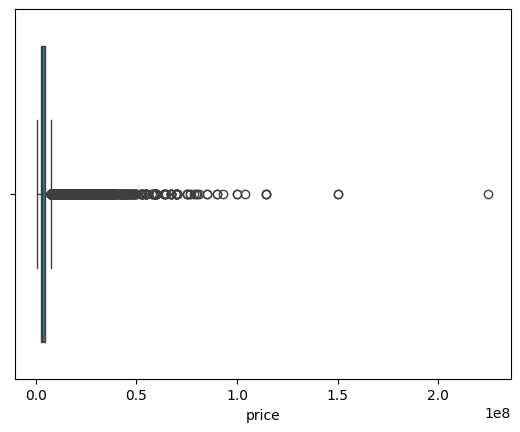

In [35]:
#Boxplot and Historgram PRICE
import seaborn as sns

sns.boxplot(x=df['price'])

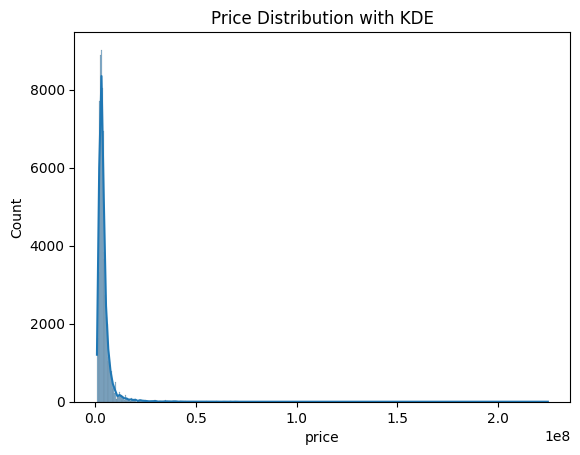

In [36]:
#Skeweness PRICE
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True)
plt.title("Price Distribution with KDE")
plt.show()

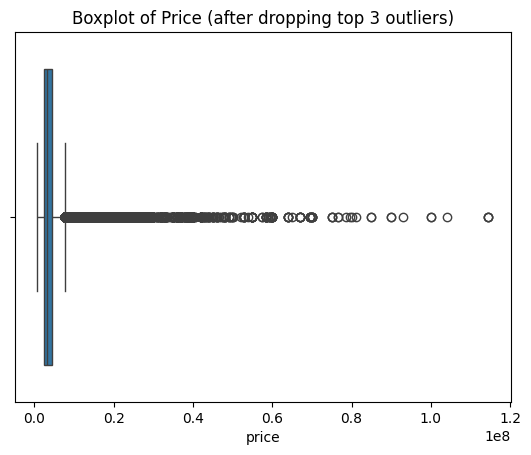

In [37]:
#Remove the highest priced observatrions
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='price', ascending=False)
df_clean = df_sorted.iloc[3:]  # drop top 3 rows
sns.boxplot(x=df_clean['price'])
plt.title("Boxplot of Price (after dropping top 3 outliers)")
plt.show()

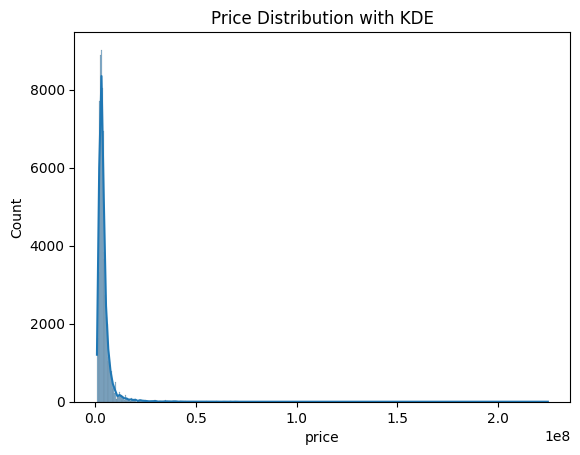

In [38]:
#Skeweneess without outliers

sns.histplot(df['price'], kde=True)
plt.title("Price Distribution with KDE")
plt.show()

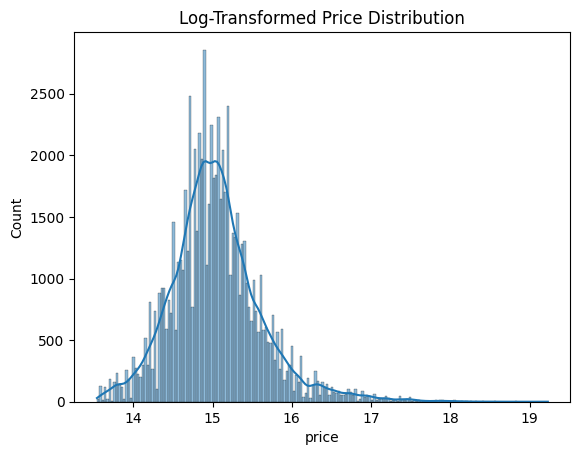

In [39]:
#Log-stransformed

sns.histplot(np.log1p(df['price']), kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

In [ ]:
# Skeweness of all numberic variables, ordered by skeweness (measured )
#≈ 0	Symmetric	
#0.5 – 1	Moderately right-skewed	
#> 1	Highly right-skewed (often needs log or power transform)	
#< -0.5	Left-skewed

num_cols = ['price', 'surface_land_sqm', 'total_area_sqm', 'garden_sqm', 'terrace_sqm', 'nbr_bedrooms', 'nbr_frontages']
df[num_cols].skew()


price                 9.450827
surface_land_sqm     68.584608
total_area_sqm      151.532491
garden_sqm           56.655663
terrace_sqm          52.366438
nbr_bedrooms         22.588168
nbr_frontages         0.413729
dtype: float64

In [ ]:
# Capping/Winsorization: replace everything above the 99th/below the 1st percentile percentile with the 99th percentile/1str percentile value
df_before = df.copy() #keeping a copy of data before capping

cap_vars = ['price', 'surface_land_sqm', 'total_area_sqm','garden_sqm', 'terrace_sqm', 'nbr_bedrooms', 'nbr_frontages']

# Choosingcapping percentiles (e.g. 1st and 99th)
lower_cap = 0.01
upper_cap = 0.99

for var in cap_vars:
    lower = df[var].quantile(lower_cap)
    upper = df[var].quantile(upper_cap)
    df[var] = np.where(df[var] < lower, lower,
                       np.where(df[var] > upper, upper, df[var]))

df[cap_vars].skew()

price               3.252450
surface_land_sqm    5.155946
total_area_sqm      1.951834
garden_sqm          5.193414
terrace_sqm         2.798223
nbr_bedrooms        1.002766
nbr_frontages       0.001382
dtype: float64

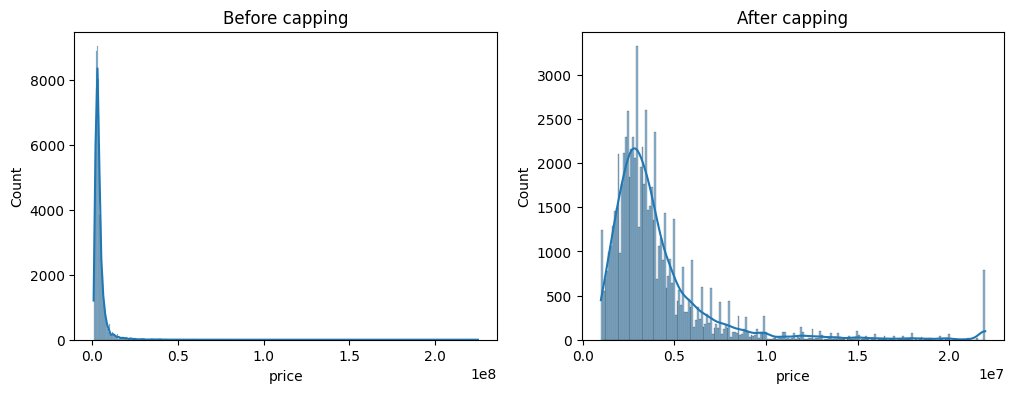

In [41]:
# Visuals before and after capping 'price'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_before['price'], kde=True, ax=axes[0])
axes[0].set_title("Before capping")
sns.histplot(df['price'], kde=True, ax=axes[1])
axes[1].set_title("After capping")
plt.show()

In [ ]:
#Capping not enough (for 5 variables), so log transformation (may not be needed if later we do tree-based models like Random Forests, XGBoost, as they can handle skeweness)
# The result is pushing the distribution to be left-skewed but still price is nicely balanced
# The other variables are not jumping to the exrtreme of left-skeweness

import numpy as np

log_vars = ['price', 'surface_land_sqm', 'total_area_sqm','garden_sqm', 'terrace_sqm']

for var in log_vars:
    df[f'{var}_log'] = np.log1p(df[var])

df[[f'{v}_log' for v in log_vars]].skew()



price_log               0.632884
surface_land_sqm_log   -1.389096
total_area_sqm_log     -2.104580
garden_sqm_log          2.013560
terrace_sqm_log         0.686216
dtype: float64

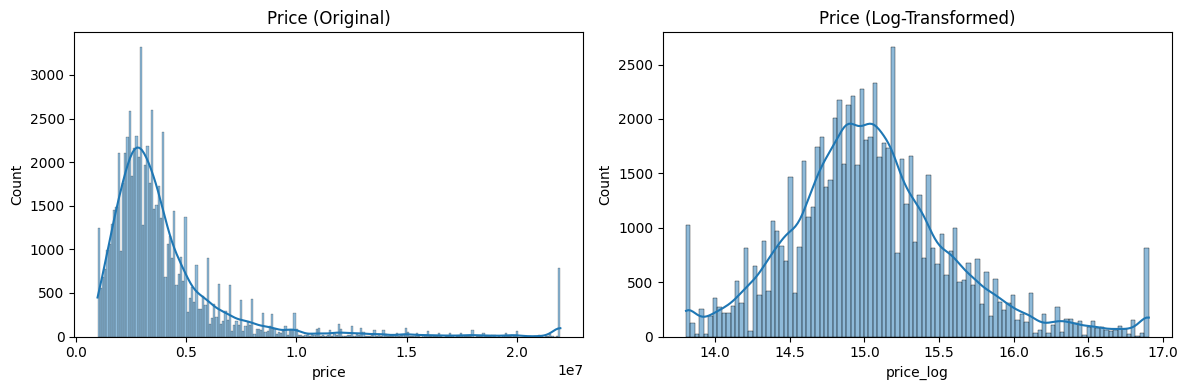

In [46]:
#Visuals for price
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title("Price (Original)")
sns.histplot(df['price_log'], kde=True, ax=axes[1])
axes[1].set_title("Price (Log-Transformed)")
plt.tight_layout()
plt.show()